## Ti6N5

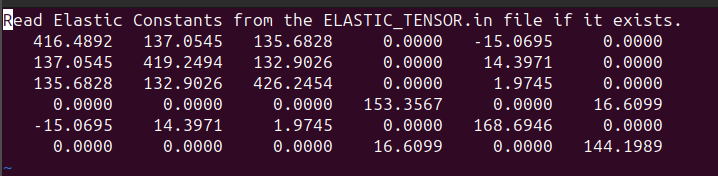

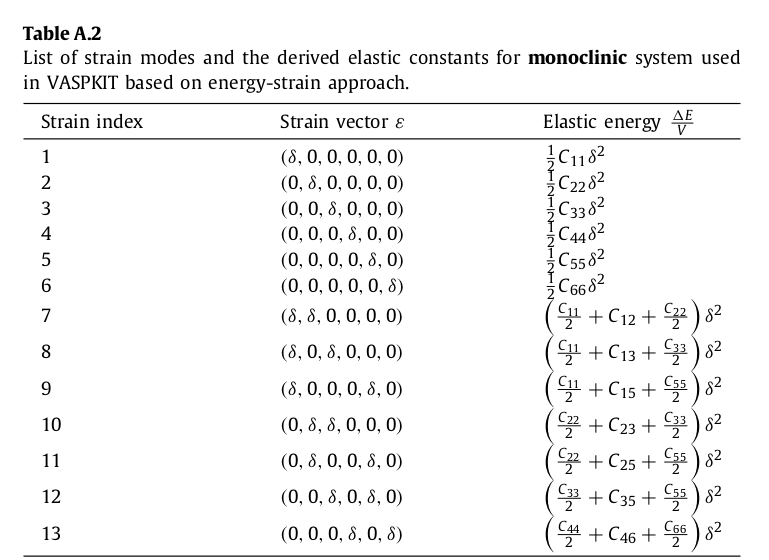

## POTENTIAL

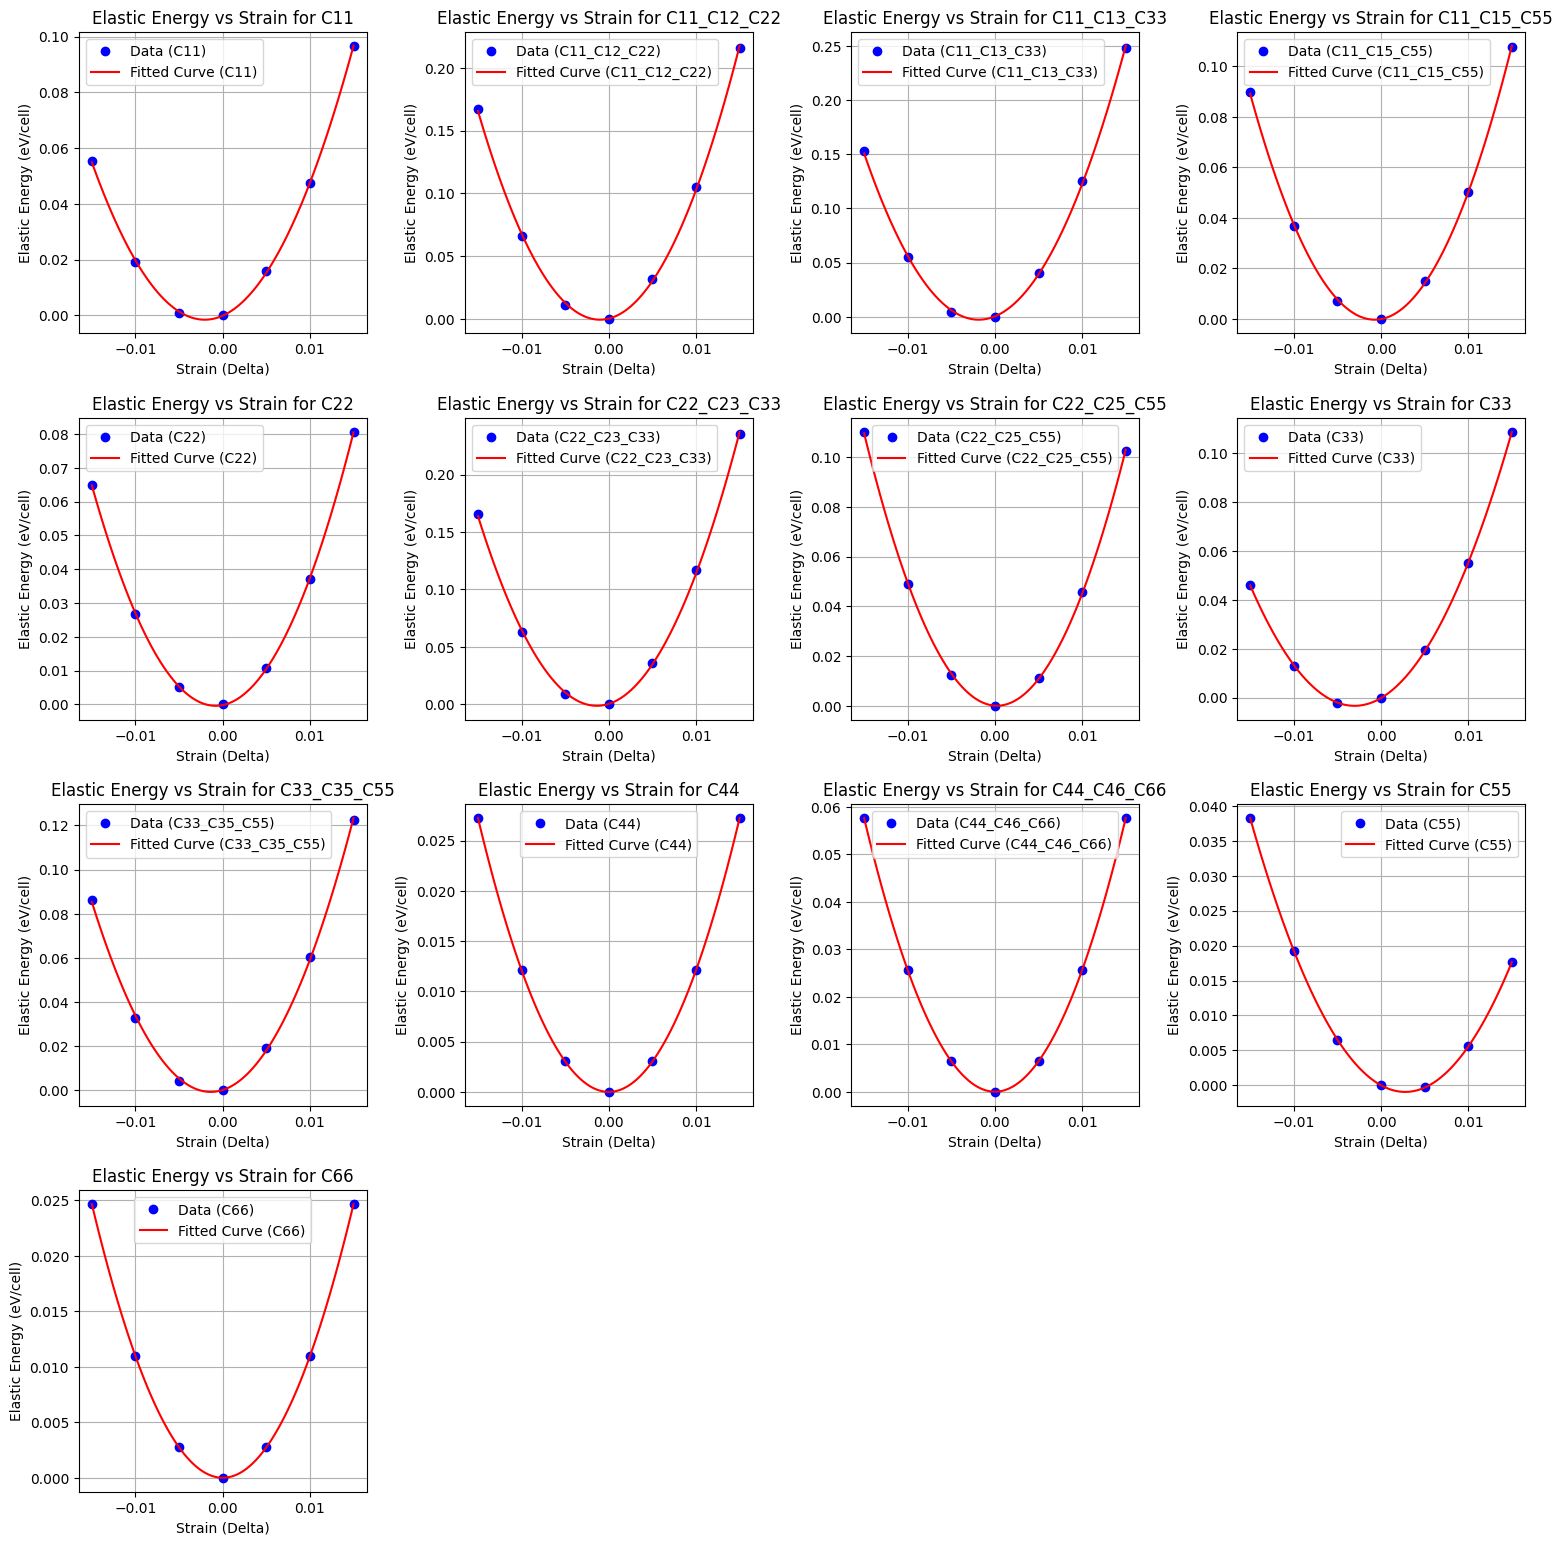

C11 C-value: 469.48757427936187 GPa
C11_C12_C22 C-value: 591.7555732766747 GPa
C11_C13_C33 C-value: 618.8733565929236 GPa
C11_C15_C55 C-value: 305.4255648326311 GPa
C22 C-value: 450.5165526879622 GPa
C22_C23_C33 C-value: 619.0525409688014 GPa
C22_C25_C55 C-value: 328.7533170712031 GPa
C33 C-value: 479.4940777242482 GPa
C33_C35_C55 C-value: 322.18841223931855 GPa
C44 C-value: 168.43066363837963 GPa
C44_C46_C66 C-value: 178.14901475983189 GPa
C55 C-value: 172.6767702901915 GPa
C66 C-value: 152.25571321359786 GPa


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv('energy_collab_potential_final')

# Extract the strain values
strain_values = data['Strain_values']

# Define formulas for each column (placeholder formulas here—replace as needed)
formulas = {
    'C11': lambda coef: 2 * coef,                   # Example formula: 1/2 * C11 * delta^2
    'C11_C12_C22': lambda coef: 1 * coef,             # Example formula: 1 * (C11/2 + C12 + C22/2) * delta^2
    'C11_C13_C33': lambda coef: 1 * coef,             # Example formula: 1 * (C11/2 + C13 + C33/2) * delta^2
    'C11_C15_C55': lambda coef: 1 * coef,             # Example formula: 1 * (C11/2 + C15 + C55/2) * delta^2
    'C22': lambda coef: 2 * coef,                   # Example formula: 1/2 * (C22) * delta^2
    'C22_C23_C33': lambda coef: 1 * coef,             # Example formula: 1 * (C22/2 + C23 + C33/2) * delta^2
    'C22_C25_C55': lambda coef: 1 * coef,             # Example formula: 1 * (C22/2 + C25 + C55/2) * delta^2
    'C33': lambda coef: 2 * coef,                   # Example formula: 1/2* (C33) * delta^2
    'C33_C35_C55': lambda coef: 1 * coef,             # Example formula: 1 * (C33/2 + C35 + C55/2) * delta^2
    'C44': lambda coef: 2 * coef,                   # Example formula: 2 * (C44) * delta^2
    'C44_C46_C66': lambda coef: 1 * coef,             # Example formula: 1 * (C44/2 + C46 + C66/2) * delta^2
    'C55': lambda coef: 2 * coef,                   # Example formula: 1 * (C55) * delta^2
    'C66': lambda coef: 2 * coef,                   # Example formula: 1 * (C66) * delta^2
    # Add more formulas as needed based on your reference
}

# Prepare to store computed C-values
C_values = {}
V0 = 230.35

# Define subplot grid dimensions
num_columns = len(data.columns) - 1  # Excluding 'Strain_values'
num_rows = (num_columns + 3) // 4  # For a 3x4 grid layout, adjust as needed

fig, axs = plt.subplots(num_rows, 4, figsize=(16, num_rows * 4))
fig.tight_layout(pad=4.0)  # Adjust spacing between subplots

# Flatten the axes array for easier indexing
axs = axs.flatten()

# Iterate over each column in the DataFrame (excluding 'Strain_values')
for i, column in enumerate(data.columns[1:]):
    # Fit a quadratic polynomial to the data
    coefficients = np.polyfit(strain_values, data[column], 2)
    
    # Apply the specific formula for each column
    if column in formulas:
        C_value = formulas[column](coefficients[0])
        C_values[column] = C_value * (160.21766/V0)
    else:
        print(f"No formula defined for {column}, skipping.")
        continue

    # Generate values for the fitted curve
    strain_fit = np.linspace(strain_values.min(), strain_values.max(), 100)
    energy_fit = np.polyval(coefficients, strain_fit)

    # Plot the data and the fitted curve in a subplot
    axs[i].plot(strain_values, data[column], 'o', label=f"Data ({column})", color="blue")
    axs[i].plot(strain_fit, energy_fit, '-', label=f"Fitted Curve ({column})", color="red")
    axs[i].set_title(f"Elastic Energy vs Strain for {column}")
    axs[i].set_xlabel("Strain (Delta)")
    axs[i].set_ylabel("Elastic Energy (eV/cell)")
    axs[i].legend()
    axs[i].grid(True)

# Remove any empty subplots (if number of columns < grid size)
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout and show the plot
plt.show()

# Print out the calculated C-values
for key, value in C_values.items():
    print(f"{key} C-value: {value} GPa")
    #print(f"{value}")

In [3]:
from sympy import symbols, Eq, solve, Matrix

# Define the variables
C11, C12, C22, C23, C31, C33, C44, C51, C52, C53, C55, C64, C66 = symbols('C11 C12 C22 C23 C31 C33 C44 C51 C52 C53 C55 C64 C66')

# Define the equations
eq1 = Eq(C11 -  469.48757427936187, 0)  
eq2 = Eq(C11/2 + C12 + C22/2  - 591.7555732766747, 0)
eq3 = Eq(C11/2 + C31 + C33/2 - 618.8733565929236, 0)
eq4 = Eq(C11/2 + C51 + C55/2 - 305.4255648326311, 0)
eq5 = Eq(C22 - 450.5165526879622, 0)
eq6 = Eq(C22/2 + C23 + C33/2 - 619.0525409688014, 0)
eq7 = Eq(C22/2 + C52 + C55/2 - 328.7533170712031, 0)
eq8 = Eq(C33 - 479.4940777242482, 0)
eq9 = Eq(C33/2 + C53 + C55/2 - 322.18841223931855, 0)
eq10 = Eq(C44 - 168.43066363837963, 0)
eq11 = Eq(C44/2 + C64 + C66/2 - 178.14901475983189, 0)
eq12 = Eq(C55 - 172.6767702901915, 0)
eq13 = Eq(C66 - 152.25571321359786, 0)

# Solve the equations
solution = solve([eq1, eq2, eq3, eq4, eq5, eq6, eq7, eq8, eq9, eq10, eq11, eq12, eq13], (C11, C12, C22, C23, C31, C33, C44, C51, C52, C53, C55, C64, C66))

# Add derived values
#solution[C22] = solution[C11]
#solution[C31] = solution[C12]
#solution[C23] = solution[C31]
#solution[C55] = solution[C44]
#solution[C66] = solution[C55]

# Construct the elastic tensor with substituted values
elastic_tensor = Matrix([
    [C11, C12, C31, 0,    C51,    0],
    [C12, C22, C23, 0,    C52,    0],
    [C31, C23, C33, 0,    C53,    0],
    [0,   0,   0,   C44,  0,    0],
    [C51,   C52,   C53,   0,    C55,  0],
    [0,   0,   0,   C64,    0,    C66]
]).subs(solution)

# Compute the compliance matrix
compliance_matrix = elastic_tensor.inv()

# Extract substituted compliance values
compliance_values = compliance_matrix.subs(solution)
S11 = compliance_values[0, 0]
S12 = compliance_values[0, 1]
S66 = compliance_values[5, 5]
S33 = compliance_values[2, 2]
S44 = compliance_values[3, 3]
S31 = compliance_values[2, 0]
S22 = compliance_values[1, 1]
S23 = compliance_values[1, 2]
S55 = compliance_values[4, 4]

# Voigt bounds equations
KV = ((solution[C11] + solution[C22] + solution[C33] + 
       2 * (solution[C12] + solution[C23] + solution[C31])) / 9)
GV = ((solution[C11] + solution[C22] + solution[C33]) - 
      (solution[C12] + solution[C23] + solution[C31]) + 
      4 * (solution[C44] + solution[C55] + solution[C66])) / 15

# Reuss bounds equations
KR = 1 / (S11 + S22 + S33 + 2 * (S12 + S23 + S31))
GR = 15 / (4 * (S11 + S22 + S33) - 4 * (S12 + S23 + S31) + 3 * (S44 + S55 + S66))

# Voigt-Reuss-Hill averages
K_VRH = (KV + KR) / 2
G_VRH = (GV + GR) / 2

# Print results
print("Solution:", solution)
print(f"Compliance Matrix:\n{compliance_values}")
print(f"Voigt Bulk Modulus, KV: {KV}")
print(f"Voigt Shear Modulus, GV: {GV}")
print(f"Reuss Bulk Modulus, KR: {KR}")
print(f"Reuss Shear Modulus, GR: {GR}")
print(f"K-VRH: {K_VRH}")
print(f"G-VRH: {G_VRH}")

Solution: {C11: 469.487574279362, C12: 131.753509793013, C22: 450.516552687962, C23: 154.047225762696, C31: 144.382530591119, C33: 479.494077724248, C44: 168.430663638380, C51: -15.6566074521460, C52: 17.1566555821260, C53: -3.89701176790100, C55: 172.676770290192, C64: 17.8058263338430, C66: 152.255713213598}
Compliance Matrix:
Matrix([[0.00246385305401561, -0.000536603030341914, -0.000567361910534978, 0, 0.000263908557843635, 0], [-0.000536603030341914, 0.00262273758960949, -0.000683667653133909, 0, -0.000324670477136560, 0], [-0.000567361910534978, -0.000683667653133909, 0.00247660265923333, 0, 7.23770628055938e-5, 0], [0, 0, 0, 0.00593716119380136, 0, 0], [0.000263908557843635, -0.000324670477136560, 7.23770628055938e-5, 0, 0.00584898724255432, 0], [0, 0, 0, -0.000694332310437186, 0, 0.00656789803740967]])
Voigt Bulk Modulus, KV: 251.096081887248
Voigt Shear Modulus, GV: 196.184501807562
Reuss Bulk Modulus, KR: 250.756776753213
Reuss Shear Modulus, GR: 162.222766818700
K-VRH: 250.9